In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# data = https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024/code
data = pd.read_csv("Data/MLR_Data.csv")

In [3]:
print(data.head())
#drop the ID column as we do not need it
data.drop('Patient_ID', axis=1, inplace=True)

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

## Step 1 : Know your data

In [4]:
print(data.shape)
print(data.isnull().sum())
print(data.describe)

(50000, 14)
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64
<bound method NDFrame.describe of        Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0       71    Male             UK  2021           6.4            2.8   
1       34    Male          China  2021           1.3            4.5   
2       80    Male       Pakistan  2023           7.4            7.9   
3       40    Male             UK  2015           1.7            2.9   
4       43  Female         Brazil  2017           5.1            2.8   
...    ...     ...            ...   ...           ...            ...   
49995   80    Male       Pakistan  2023           2.3      

## Step 2 : Divide the data into dependent and independent feature

In [5]:
X = data.iloc[:,:-1] # all features except the last
y = data.iloc[:,-1] # the last feature

## Step 3 : Train and Test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37500, 13)
(12500, 13)
(37500,)
(12500,)


## Step  4 : Handling categorical data and scaling values

In [7]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 24295 to 47493
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 37500 non-null  int64  
 1   Gender              37500 non-null  object 
 2   Country_Region      37500 non-null  object 
 3   Year                37500 non-null  int64  
 4   Genetic_Risk        37500 non-null  float64
 5   Air_Pollution       37500 non-null  float64
 6   Alcohol_Use         37500 non-null  float64
 7   Smoking             37500 non-null  float64
 8   Obesity_Level       37500 non-null  float64
 9   Cancer_Type         37500 non-null  object 
 10  Cancer_Stage        37500 non-null  object 
 11  Treatment_Cost_USD  37500 non-null  float64
 12  Survival_Years      37500 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 29694 to 11970
Data columns (total 

(None, None)

In [8]:
X_train.columns, X_test.columns

(Index(['Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
        'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
        'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years'],
       dtype='object'),
 Index(['Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
        'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
        'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years'],
       dtype='object'))

In [9]:
from sklearn.preprocessing import StandardScaler

categorical_features = ['Gender','Country_Region', 'Cancer_Type', 'Cancer_Stage']
numeric_features = ['Age', 'Year', 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']

# Convert categorical to category dtype
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# One-hot encode (fit only on X_train, align X_test)
X_train_encoded = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[categorical_features], drop_first=True)

# Align test set to training set to ensure same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Scale numeric features (fit scaler on train only)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]),
                              columns=numeric_features,
                              index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_features]),
                             columns=numeric_features,
                             index=X_test.index)

# Combine scaled numeric and encoded categorical
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

## Step 5 : Apply Multiple Linear Regression 

In [10]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_final,y_train)

LinearRegression()

In [11]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train_final, y_train,scoring="r2",cv=3)
np.mean(validation_score)

0.999994205934201

In [12]:
y_pred = regression.predict(X_test_final)

In [13]:
# Printing the coefficient and intercept of Experience
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [-4.36050644e-06 -2.70175693e-05  5.77231174e-01  4.32536394e-01
  4.32907930e-01  5.76807671e-01  2.89198846e-01 -5.46476901e-01
 -2.81218562e-06 -1.30633872e-05 -8.83213736e-06 -7.11716082e-05
  5.35613442e-06 -2.36997737e-05 -4.31479995e-05 -1.31751809e-04
 -1.81031097e-06 -8.40720953e-05 -9.75840510e-05  2.77884592e-06
 -2.97653830e-05 -1.66143917e-05 -3.43205219e-05  5.82134459e-05
 -1.97275611e-05 -1.22265536e-05 -9.15467521e-05 -2.07291555e-05
  6.02311197e-06 -6.31508031e-05 -6.06816808e-05]
Intercept :  4.951894029727818


In [14]:
reg_summary = pd.DataFrame(X_train_final.columns.values, columns=['Features'])
reg_summary['Weights'] = regression.coef_
reg_summary

,Features,Weights
0,Age,-0.000004
1,Year,-0.000027
2,Genetic_Risk,0.577231
3,Air_Pollution,0.432536
4,Alcohol_Use,0.432908
5,Smoking,0.576808
6,Obesity_Level,0.289199
7,Treatment_Cost_USD,-0.546477
8,Survival_Years,-0.000003
9,Gender_Male,-0.000013


## Step 6 : Calculate the performance metrics

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

0.0024913007234714053
8.282157540100343e-06
0.002877873788076945
0.9999942681303656


## Step 6.1 : Formula for Adjusted R²

### Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)] 

### Where:
### R²: is the coefficient of determination (R-squared) from your model. 
### n: is the number of data points in your train dataset. 
### k: is the number of independent variables in your model. 

In [16]:
adjusted_r2 = 1 - ((1 - score) * (X_train_final.shape[0] - 1) / (X_train_final.shape[0] - X_train_final.shape[1] - 1))
print(adjusted_r2)

0.9999942633879733


## Step 7: Linear Regression Assumptions

### Assumption 1 : y_test vs. y_pred doesn’t have to be linear but a nonlinear pattern could be a red flag

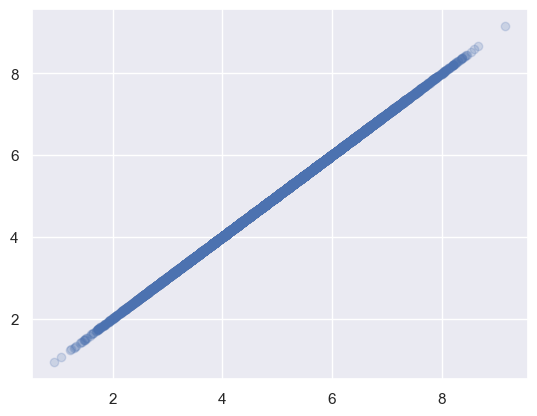

In [17]:
plt.scatter(y_test, y_pred, alpha = 0.2)

### Assumption 2 : The residuals should be normally distributed with mean = 0

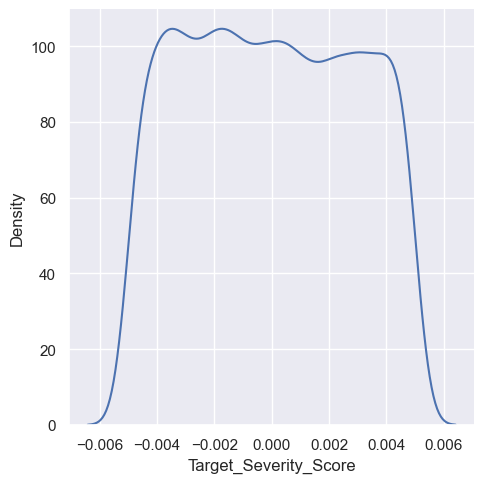

In [18]:
residuals = y_test-y_pred
sns.displot(residuals, kind='kde')

### Assumption 3 : Residuals should look like random noise (no pattern). If you see a pattern, the linear model might not be suitable.

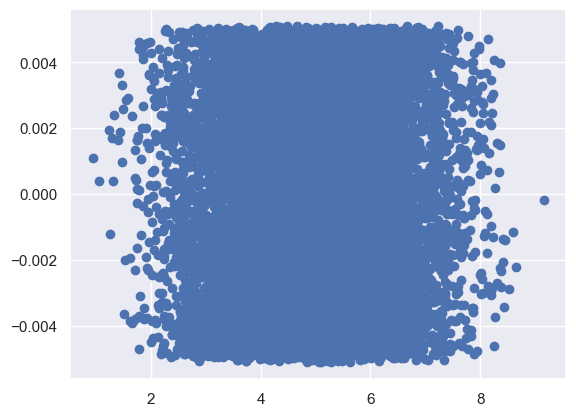

In [19]:
plt.scatter(y_pred,residuals)

## Step 8 : Save the model using Pickle

In [20]:
import pickle 
pickle.dump(regression,open('multilinear_regression_model.pkl', 'wb')) # downloading the model

In [21]:
model = pickle.load(open('multilinear_regression_model.pkl','rb')) # used to load the model

In [22]:
print(model)

LinearRegression()
